# 6.5: Unsupervised Machine Learning: Clustering

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create a path
path = r'C:\Users\Asus-Pc\Desktop\CareerFoundry\Data Analytics Immersion\6. Advanced Analytics & Dashboard Design\Task 6.1 - Sourcing Open Data\UFC fight historical data 1993-2021'

In [4]:
# Import preprocessed_data.csv
df_ufc = pd.read_csv(os.path.join(path, 'preprocessed_data.csv'), index_col = False)

In [5]:
df_ufc.shape

(5902, 160)

In [6]:
# Use reduced dataframes with only the information we want
df_blue = df_ufc[['B_wins', 'B_avg_KD', 'B_avg_SIG_STR_landed', 'B_avg_TD_pct']]

In [7]:
# Use reduced dataframes with only the information we want
df_red = df_ufc[['R_wins', 'R_avg_KD', 'R_avg_SIG_STR_landed', 'R_avg_TD_pct']]

#### Elbow tecnique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df_blue).score(df_blue) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

[-2254855.3246613094,
 -905288.9464812006,
 -518497.68548894,
 -311520.16810057906,
 -230542.15305819438,
 -182750.00218977875,
 -149495.33957335274,
 -128423.24958594341,
 -114094.32139073465]

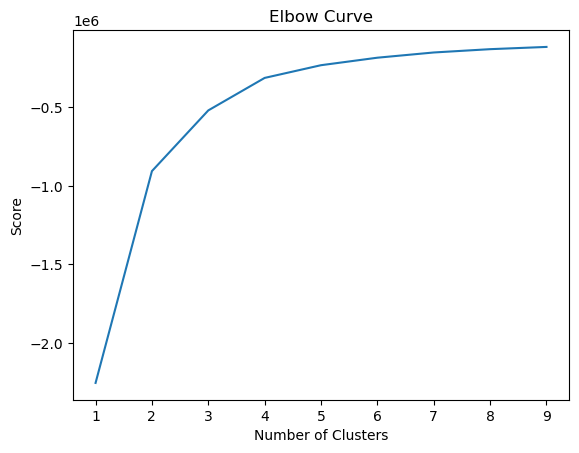

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  Here, there's a large jump from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

#### Blue corner

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df_blue)

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [13]:
df_blue['clusters'] = kmeans.fit_predict(df_blue)

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus-Pc\AppData\Local\Temp\ipykernel_17264\2702946750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blue['clusters'] = kmeans.fit_predict(df_blue)


In [14]:
df_blue.head()

,B_wins,B_avg_KD,B_avg_SIG_STR_landed,B_avg_TD_pct,clusters
0,1,0.000000,20.0000,0.330,2
1,2,0.500000,35.0000,0.300,0
2,0,0.015625,29.6875,0.250,0
3,0,0.015625,29.6875,0.250,0
4,4,0.125000,57.9375,0.185,1


In [15]:
df_blue['clusters'].value_counts()

clusters
0    3032
2    1593
1    1032
3     245
Name: count, dtype: int64

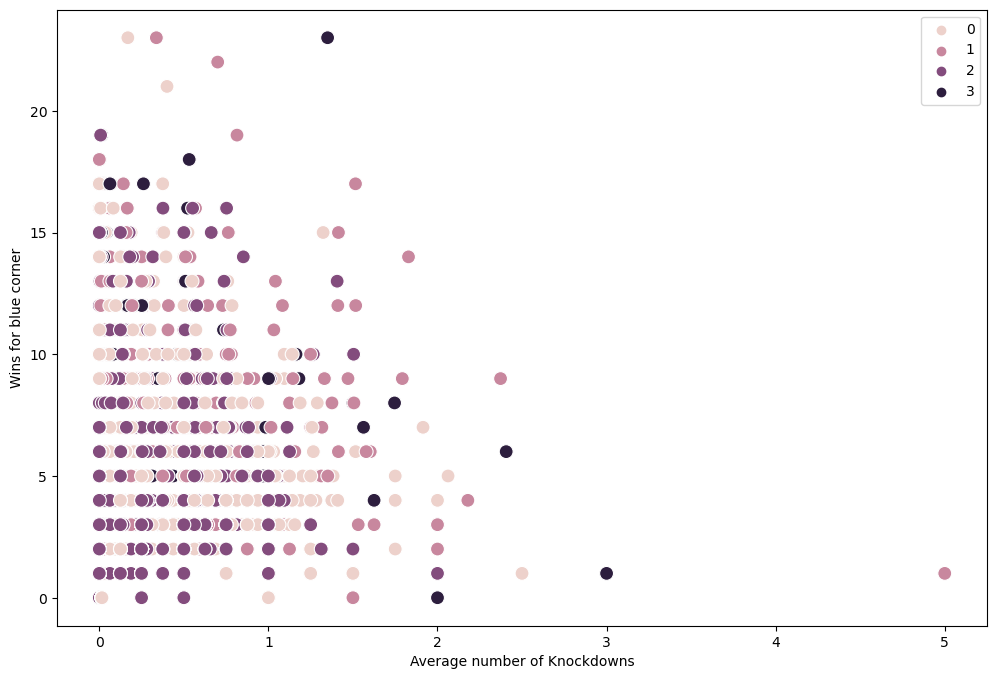

In [16]:
# Plot the clusters for the "Average number of knockdowns" and "Wins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_blue['B_avg_KD'], y=df_blue['B_wins'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average number of Knockdowns') # Label x-axis.
plt.ylabel('Wins for blue corner') # Label y-axis.
plt.show()

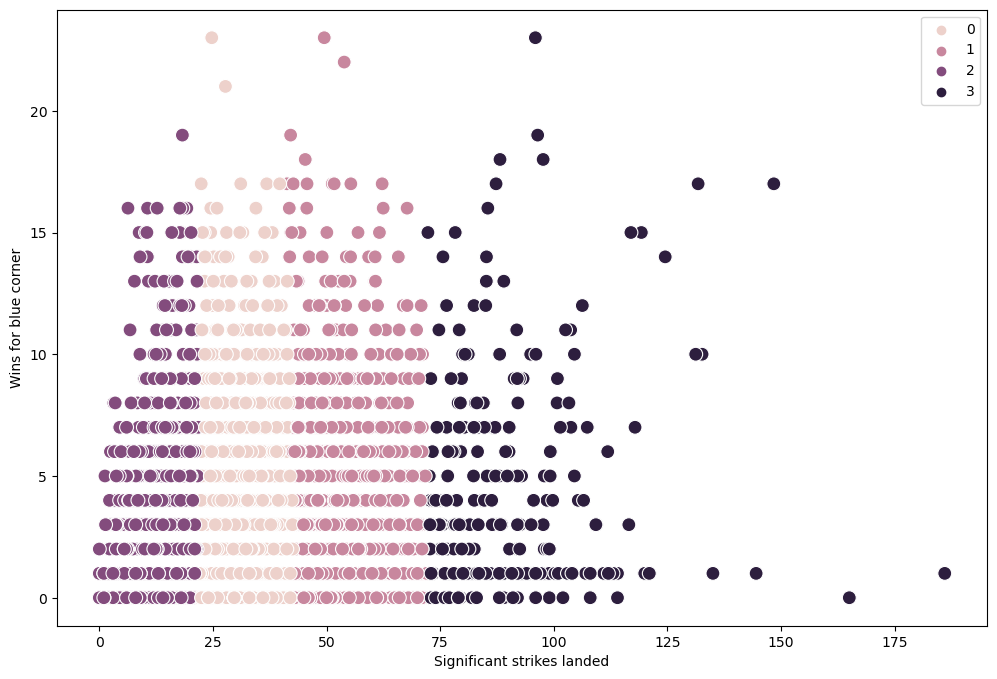

In [17]:
# Plot the clusters for the "Significant strikes landed" and "Wins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_blue['B_avg_SIG_STR_landed'], y=df_blue['B_wins'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Significant strikes landed') # Label x-axis.
plt.ylabel('Wins for blue corner') # Label y-axis.
plt.show()

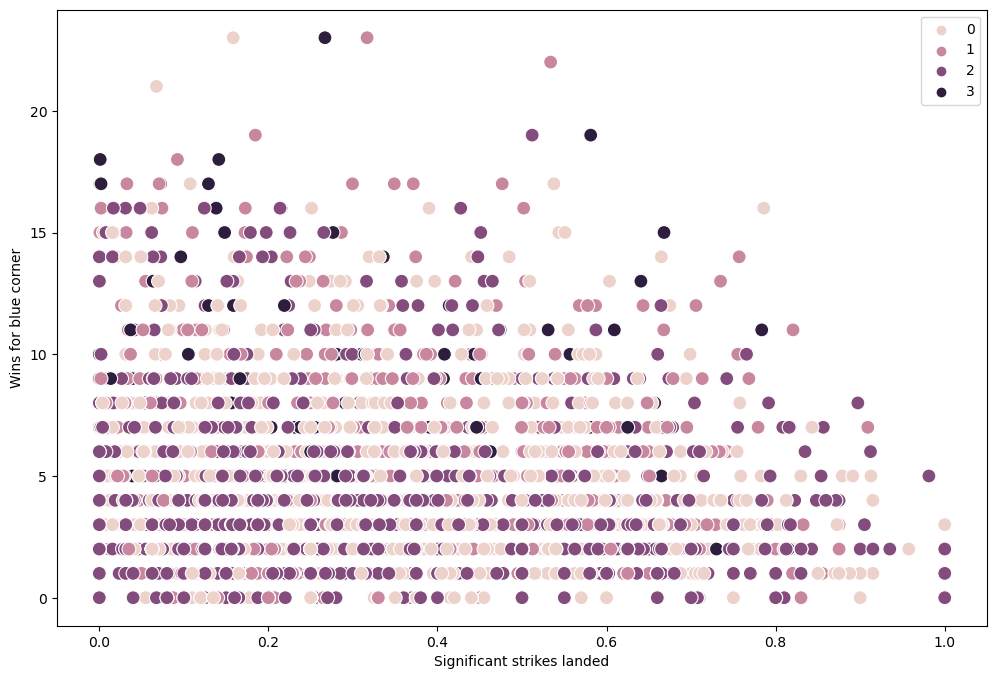

In [24]:
# Plot the clusters for the "Average takedown percentage" and "Wins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_blue['B_avg_TD_pct'], y=df_blue['B_wins'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average takedown percentage') # Label x-axis.
plt.ylabel('Wins for blue corner') # Label y-axis.
plt.show()

#### It is very difficult to sort something useful out of these plots. Calculating some descriptive statistics could help us understanding more clearly our data.

In [21]:
df_blue.loc[df_blue['clusters'] == 3, 'cluster'] = 'violet'
df_blue.loc[df_blue['clusters'] == 2, 'cluster'] = 'dark purple'
df_blue.loc[df_blue['clusters'] == 1, 'cluster'] = 'purple'
df_blue.loc[df_blue['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Asus-Pc\AppData\Local\Temp\ipykernel_17264\2519593207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blue.loc[df_blue['clusters'] == 3, 'cluster'] = 'violet'


In [23]:
df_blue.groupby('cluster').agg({'B_wins':['mean', 'median'], 
                         'B_avg_TD_pct':['mean', 'median'], 
                         'B_avg_SIG_STR_landed':['mean', 'median'],
                          'B_avg_KD':['mean', 'median']})

B_wins        B_avg_TD_pct           B_avg_SIG_STR_landed  \
                 mean median         mean    median                 mean   
cluster                                                                    
dark purple  2.648462    2.0     0.272987  0.187307            12.550259   
pink         1.877309    0.0     0.282396  0.250000            30.771249   
purple       4.075581    3.0     0.300134  0.250000            54.384806   
violet       4.563265    3.0     0.273998  0.220156            89.686129   

                        B_avg_KD            
                median      mean    median  
cluster                                     
dark purple  13.250000  0.211967  0.000000  
pink         29.687500  0.149312  0.015625  
purple       53.000000  0.277063  0.058960  
violet       85.478661  0.274031  0.007812

#### It seems that, for purple and violet clusters, the victory is more frequent than the other two clusters. Since the average takedown percentage's mean and median values seems to be roughly the same for all clusters, what makes the difference is the average number of knockdowns and, even more, the average number of significant strikes landed.

#### So, regarding the fighters in the blue corner, it seems that one of the keys to victory might be the volume, i.e. a high number of significant strikes.

#### Red corner

In [25]:
# Fit the k-means object to the data.

kmeans.fit(df_red)

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [26]:
df_red['clusters'] = kmeans.fit_predict(df_red)

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus-Pc\AppData\Local\Temp\ipykernel_17264\1423201214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['clusters'] = kmeans.fit_predict(df_red)


In [27]:
df_red.head()

,R_wins,R_avg_KD,R_avg_SIG_STR_landed,R_avg_TD_pct,clusters
0,1,1.000000,17.000000,0.000000,2
1,4,1.031250,43.156250,0.406250,0
2,4,0.546875,30.375000,0.000000,0
3,0,0.047168,30.500000,0.250000,0
4,5,0.000000,44.362305,0.511719,1


In [28]:
df_red['clusters'].value_counts()

clusters
0    2713
2    1720
1    1169
3     300
Name: count, dtype: int64

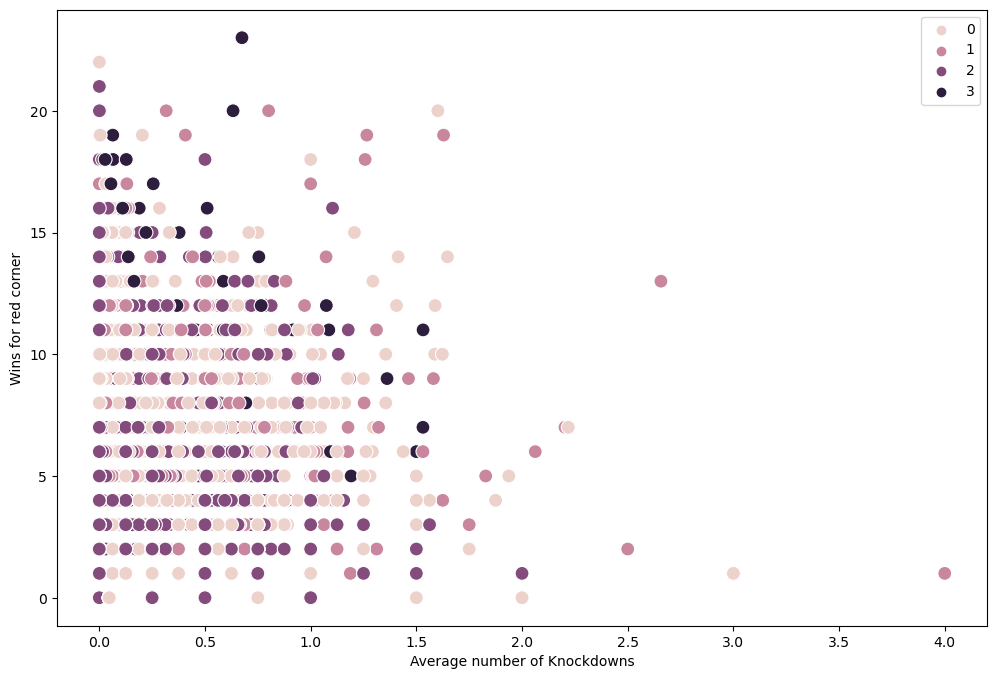

In [29]:
# Plot the clusters for the "Average number of knockdowns" and "Wins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_red['R_avg_KD'], y=df_red['R_wins'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Average number of Knockdowns') # Label x-axis.
plt.ylabel('Wins for red corner') # Label y-axis.
plt.show()

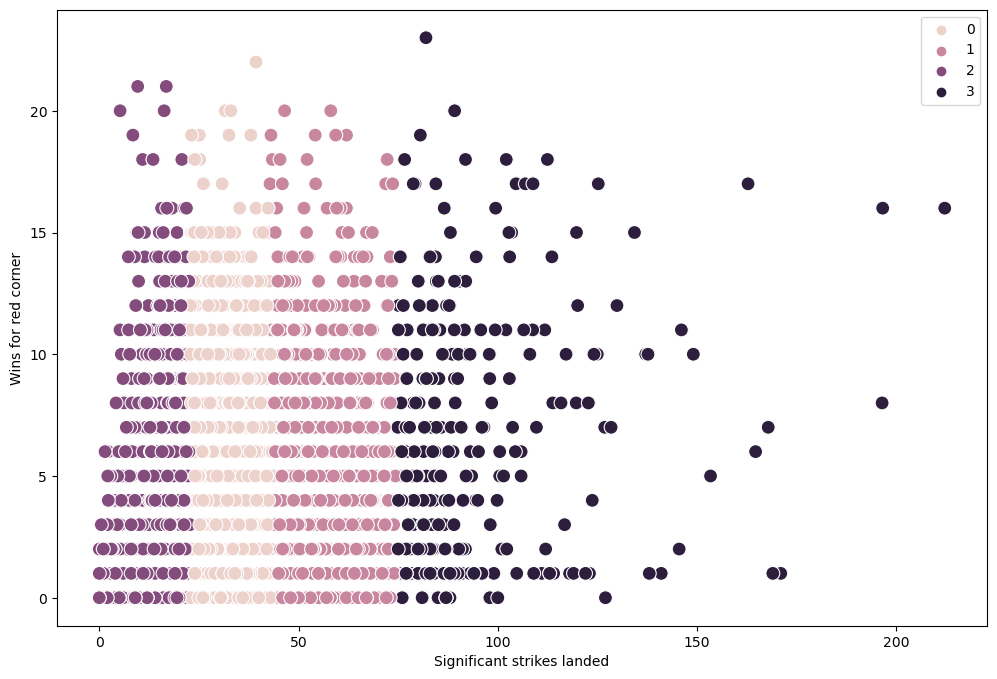

In [30]:
# Plot the clusters for the "Significant strikes landed" and "Wins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_red['R_avg_SIG_STR_landed'], y=df_red['R_wins'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Significant strikes landed') # Label x-axis.
plt.ylabel('Wins for red corner') # Label y-axis.
plt.show()

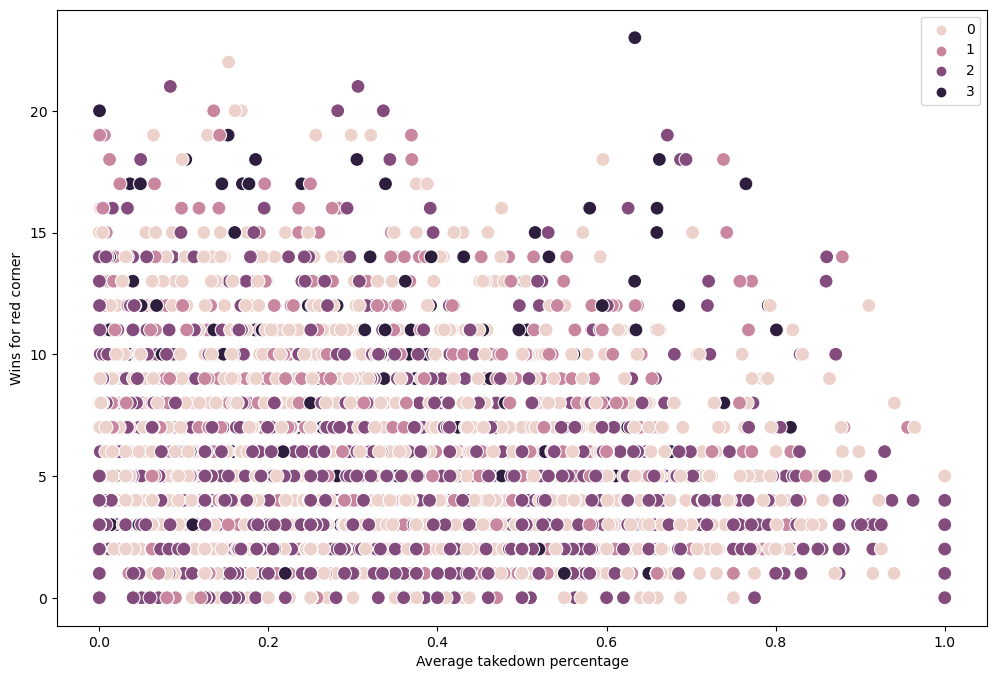

In [31]:
# Plot the clusters for the "Average takedown percentage" and "Wins" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_red['R_avg_TD_pct'], y=df_red['R_wins'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average takedown percentage') # Label x-axis.
plt.ylabel('Wins for red corner') # Label y-axis.
plt.show()

In [32]:
df_red.loc[df_red['clusters'] == 3, 'cluster'] = 'violet'
df_red.loc[df_red['clusters'] == 2, 'cluster'] = 'dark purple'
df_red.loc[df_red['clusters'] == 1, 'cluster'] = 'purple'
df_red.loc[df_red['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Asus-Pc\AppData\Local\Temp\ipykernel_17264\3897472195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red.loc[df_red['clusters'] == 3, 'cluster'] = 'violet'


In [33]:
df_red.groupby('cluster').agg({'R_wins':['mean', 'median'], 
                         'R_avg_TD_pct':['mean', 'median'], 
                         'R_avg_SIG_STR_landed':['mean', 'median'],
                          'R_avg_KD':['mean', 'median']})

R_wins        R_avg_TD_pct           R_avg_SIG_STR_landed  \
                 mean median         mean    median                 mean   
cluster                                                                    
dark purple  3.369767    2.0     0.297330  0.250000            13.775905   
pink         3.258017    2.0     0.298903  0.250000            31.726946   
purple       4.897348    4.0     0.281840  0.250000            55.358303   
violet       6.086667    5.0     0.304029  0.260254            93.559852   

                        R_avg_KD            
                median      mean    median  
cluster                                     
dark purple  14.542969  0.212680  0.003906  
pink         30.500000  0.210672  0.047168  
purple       53.750000  0.252816  0.062500  
violet       86.111328  0.237632  0.032074

#### The results obtained before for the blue corner are even more sharp for the red corner: in fact, it seems that the fighers gaining more wins place more significant strikes than their colleagues who don't have a high number of wins. 

#### To recap, based on our analysis, it seems that one of the key to win UFC fights is to place a high number of significant strikes. Knockdowns and takedowns landed don't play a big role in determining who wins a bout.